<b>Problem statement:

Given profiles representing fictional customers from an e-commerce company. The profiles contain information about the customer, their orders, their transactions ,what payment methods they used and whether the customer is fraudulent or not.
We need to predict the given customer is fraudulent or not based on the above factors</b>

<h2>Loading and parsing Json file</h2>

In [32]:
import json
data = []
with open('customersdata.json') as f:
    for line in f:
        data.append(json.loads(line))
for item in data:
    print(item['customer']['customerEmail'],': paymentMethods-->',len(item['paymentMethods']),'transactions-->',(len(item['transactions'])),'orders-->',len(item['orders']))

josephhoward@yahoo.com : paymentMethods--> 1 transactions--> 2 orders--> 2
evansjeffery@yahoo.com : paymentMethods--> 7 transactions--> 3 orders--> 3
andersonwilliam@yahoo.com : paymentMethods--> 2 transactions--> 5 orders--> 3
rubenjuarez@yahoo.com : paymentMethods--> 1 transactions--> 3 orders--> 3
uchen@malone.com : paymentMethods--> 6 transactions--> 7 orders--> 7
robinsoncynthia@dunn.com : paymentMethods--> 2 transactions--> 1 orders--> 1
samuel15@saunders-rhodes.com : paymentMethods--> 2 transactions--> 2 orders--> 1
johnlowery@gmail.com : paymentMethods--> 2 transactions--> 6 orders--> 5
jameslandry@rodriguez.com : paymentMethods--> 1 transactions--> 5 orders--> 2
ubranch@rivera-parker.info : paymentMethods--> 1 transactions--> 0 orders--> 0
bowenwilliam@yahoo.com : paymentMethods--> 1 transactions--> 6 orders--> 5
ksummers@hotmail.com : paymentMethods--> 4 transactions--> 7 orders--> 5
christineklein@wright-boyd.org : paymentMethods--> 3 transactions--> 4 orders--> 4
meganwalte

<b>By looking at the data. We have details about customer , mutiple payment methods, transaction and orders. A fraudulent node tells us whether the customer is fraudulent or not</b>

In [53]:
#Data point example
import json
data = []
with open('customersdata.json') as f:
    for line in f:
        data.append(json.loads(line))
print('--'*10,'Customer Details','--'*10)
for item in data[0]['customer'].items():
    print(item[0],'-->',item[1])
print('--'*10,'Payment Details','--'*10)
for j,item in enumerate(data[0]['paymentMethods']):
    print('Payment',j+1)
    print(item.values())
    for i in item.items():
        print(i[0],'-->',i[1])
print('--'*10,'transactions','--'*10)
for j,item in enumerate(data[0]['transactions']):
    print('Transaction',j+1)
    for i in item.items():
        print(i[0],'-->',i[1])
print('--'*10,'orders','--'*10)
for j,item in enumerate(data[0]['orders']):
    print('Order',j+1)
    for i in item.items():
        print(i[0],'-->',i[1])
print('--'*10,'Fradulent?','--'*10)
print('Yes' if data[0]['fraudulent'] else 'No')
    #print(item[0],'-->',item[1])
#print(data[0]['customer']['customerEmail'],': paymentMethods-->',len(data[0]['paymentMethods']),'transactions-->',(len(data[0]['transactions'])),'orders-->',len(data[0]['orders']))

-------------------- Customer Details --------------------
customerEmail --> josephhoward@yahoo.com
customerPhone --> 400-108-5415
customerDevice --> yyeiaxpltf82440jnb3v
customerIPAddress --> 8.129.104.40
customerBillingAddress --> 5493 Jones Islands
Brownside, CA 51896
-------------------- Payment Details --------------------
Payment 1
dict_values(['wt07xm68b', True, 'card', 'JCB 16 digit', 'Citizens First Banks'])
paymentMethodId --> wt07xm68b
paymentMethodRegistrationFailure --> True
paymentMethodType --> card
paymentMethodProvider --> JCB 16 digit
paymentMethodIssuer --> Citizens First Banks
-------------------- transactions --------------------
Transaction 1
transactionId --> a9lcj51r
orderId --> vjbdvd
paymentMethodId --> wt07xm68b
transactionAmount --> 18
transactionFailed --> False
Transaction 2
transactionId --> y4wcv03i
orderId --> yp6x27
paymentMethodId --> wt07xm68b
transactionAmount --> 26
transactionFailed --> False
-------------------- orders --------------------
Order 

<h2>Converting json data into Dataframes</h2>

In [57]:
def get_cust_transactions(customer_id,c_trn):
    cust_transactions=[]
    cust_transactions1=[]
    for item in c_trn:
        #print('Transaction',j+1)
        cust_transactions1.append(customer_id)
        cust_transactions1.extend(item.values())
        cust_transactions.append(cust_transactions1)
        cust_transactions1=[]
    return cust_transactions,len(c_trn)
def get_cust_orders(customer_id,c_orders):
    cust_orders=[]
    cust_orders1=[]
    for item in c_orders:
        #print('Transaction',j+1)
        cust_orders1.append(customer_id)
        cust_orders1.extend(item.values())
        cust_orders.append(cust_orders1)
        cust_orders1=[]
    return cust_orders,len(c_orders)
def get_cust_payment_methods(customer_id,c_payment_methods):
    cust_pmethods=[]
    cust_pmethods1=[]
    for item in c_payment_methods:
        #print('Transaction',j+1)
        cust_pmethods1.append(customer_id)
        cust_pmethods1.extend(item.values())
        cust_pmethods.append(cust_pmethods1)
        cust_pmethods1=[]
    return cust_pmethods,len(c_payment_methods)

In [55]:
data = []
with open('customersdata.json') as f:
    for line in f:
        data.append(json.loads(line))

In [86]:
import json
customer_details=[]
customer_payments=[]
customer_transactions=[]
customer_orders=[]
customer_details_bkp=[]
for p in data:
    customer_details_bkp.append(list(p['customer'].values()))
    t_temp = get_cust_transactions(p['customer']['customerEmail'],p['transactions'])
    o_temp = get_cust_orders(p['customer']['customerEmail'],p['orders'])
    p_temp  = get_cust_payment_methods(p['customer']['customerEmail'],p['paymentMethods'])
    customer_transactions.extend(t_temp[0])
    customer_orders.extend(o_temp[0])
    customer_payments.extend(p_temp[0])
    customer_details_bkp[0].extend([t_temp[1],o_temp[1],p_temp[1],p['fraudulent']])
    customer_details.append(customer_details_bkp[0])
    customer_details_bkp=[]

<h2>Creating Dataframes for the customer details, payments, transactions and orders</h2>

In [88]:
import pandas as pd
customer_columns=['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress','No_Transactions','No_Orders','No_Payments','Fraud']
order_columns=['customerEmail', 'orderId', 'orderAmount', 'orderState', 'orderShippingAddress']
payemnt_columns=['customerEmail', 'paymentMethodId', 'paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer']
transaction_columns=['customerEmail', 'transactionId', 'orderId', 'paymentMethodId', 'transactionAmount', 'transactionFailed']
Customer_DF = pd.DataFrame(customer_details,columns=customer_columns)
Customer_Orders_DF = pd.DataFrame(customer_orders,columns=order_columns)
Customer_Payment_DF = pd.DataFrame(customer_payments,columns=payemnt_columns)
Customer_transaction_DF = pd.DataFrame(customer_transactions,columns=transaction_columns)

In [146]:
Customer_DF.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [147]:
Customer_Orders_DF.head()

,customerEmail,orderId,orderAmount,orderState,orderShippingAddress
0,josephhoward@yahoo.com,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,josephhoward@yahoo.com,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,evansjeffery@yahoo.com,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,evansjeffery@yahoo.com,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,evansjeffery@yahoo.com,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [148]:
Customer_Payment_DF.head()

,customerEmail,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,josephhoward@yahoo.com,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,evansjeffery@yahoo.com,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,evansjeffery@yahoo.com,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,evansjeffery@yahoo.com,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,evansjeffery@yahoo.com,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


In [225]:
print(Customer_DF.shape)
print(Customer_Payment_DF.shape)
print(Customer_Orders_DF.shape)

(168, 11)
(342, 6)
(478, 5)


In [149]:
Customer_transaction_DF.head()

,customerEmail,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,26,False
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,45,False
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,23,False
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,43,True


<h2>Data Description and EDA</h2>

In [112]:
print('total customer records',Customer_DF.shape[0], 'total unique customer',len(Customer_DF.customerEmail.unique()))

total customer records 168 total unique customer 161


In [117]:
Customer_DF[Customer_DF['customerEmail'].duplicated()]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True
45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True
79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True
155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


There are 8 duplicate emails in the data, and all these records are classified as fraduluent.
Created a column called is_duplicate to catch this behaviour

In [308]:
Customer_DF['Is_Duplicate_Name'] = Customer_DF['customerEmail'].apply(lambda x: 1 if (Customer_DF[Customer_DF.customerEmail==x]['customerEmail'].shape[0]>1) else 0)
Customer_DF['Is_Duplicate_IP'] = Customer_DF['customerIPAddress'].apply(lambda x: 1 if (Customer_DF[Customer_DF.customerIPAddress==x]['customerIPAddress'].shape[0]>1) else 0)
Customer_DF['Is_Duplicate_Address'] = Customer_DF['customerBillingAddress'].apply(lambda x: 1 if (Customer_DF[Customer_DF.customerBillingAddress==x]['customerBillingAddress'].shape[0]>1) else 0)

In [309]:
Customer_DF.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Fraud_Decoded,Is_Duplicate_Name,No_Successfull_Transactions,No_Failed_Transactions,No_Failed_Orders,No_Success_Orders,No_Pending_Orders,Is_Duplicate_IP,Is_Duplicate_Address
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,0,2,0,0,1,1,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1,0,2,1,0,3,0,0,0
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,0,0,3,2,1,2,0,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,0,0,3,0,0,3,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,1,0,5,2,1,6,0,0,0


<h2>Customer with maximum orders , transactions and payments</h2>

In [152]:
Customer_DF[Customer_DF.No_Transactions==Customer_DF.No_Transactions.max()]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Fraud_Decoded
143,mitchellgriffith@yahoo.com,1-321-386-6855x0101,72stamnugxuz9ls1xx98,158.185.147.61,Unit 6719 Box 6044\nDPO AE 33534,15,3,1,False,0


In [122]:
Customer_DF[Customer_DF.No_Orders==Customer_DF.No_Orders.max()]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
84,lleonard@turner-fleming.com,1-414-937-7421x73705,yfpqgg5oxsn107veaala,97.111.97.42,"96103 Riley Walks\nMichellefort, ID 98085-6066",11,8,1,True
97,vmiller@hotmail.com,000-734-4774,b1tjk5s0j9ybj1qpt3ik,164.79.214.9,"PSC 9111, Box 9839\nAPO AA 57283-9646",10,8,1,True
98,david45@gmail.com,(508)223-3834,l6qv05oe0h0j78kx84ex,9d8d:535b:36fc:8773:bec0:8fa5:3206:4cb5,"5360 Adams Falls Suite 829\nHensleymouth, WV 8...",10,8,5,True
103,tmcpherson@wright.com,1-804-264-1481x08539,ui77ukzr5lnqpajdk03u,296d:59fe:a919:21ac:16dd:96f5:10b3:4f83,"7956 Alex Avenue Apt. 593\nPort Michael, OK 41350",13,8,1,True


In [151]:
Customer_DF[Customer_DF.No_Payments==Customer_DF.No_Payments.max()]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Fraud_Decoded
68,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,1


In [150]:
Customer_DF['Fraud_Decoded'] = Customer_DF['Fraud'].apply(lambda x: 1 if x else 0)

In [127]:
print('Average No payments ',round(Customer_DF.No_Payments.mean()))
print('Average No Transactions ',round(Customer_DF.No_Transactions.mean()))
print('Average No orders ',round(Customer_DF.No_Orders.mean() ))

Average No payments  2
Average No Transactions  4
Average No orders  3


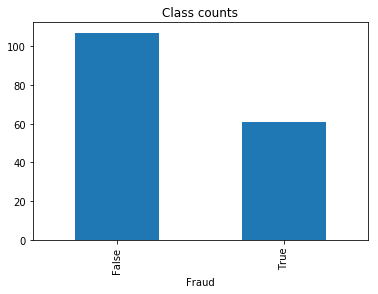

In [145]:
import matplotlib.pyplot as plt
Customer_DF.groupby(by=['Fraud'])['Fraud'].count().plot(kind='bar')
plt.title('Class counts')
plt.show()

<b>Classes are partially balanced</b>

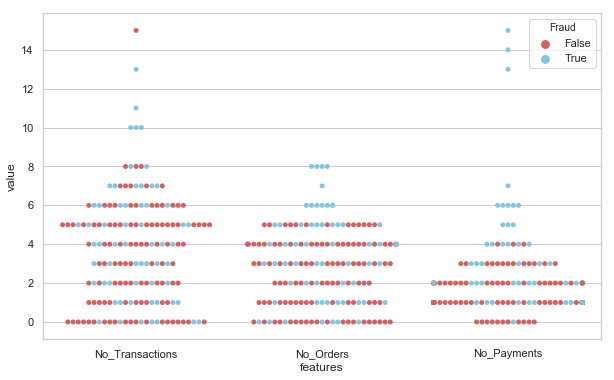

In [184]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" or "tidy" representation
abc = pd.melt(Customer_DF[['No_Transactions','No_Orders','No_Payments','Fraud']], "Fraud", var_name="features")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10, 6))
sns.swarmplot(x="features", y="value", hue="Fraud",
              palette=["r", "c", "y"], data=abc)

<b> As we see that, if the values of any feature is higher then we can say that,it is non fraudulent transaction. 
But we are not sure about the fraudulent transactions.We need to do some feature engineering techniques to seggregate the model properly</b>

In [153]:
X = Customer_DF[['No_Transactions','No_Orders','No_Payments']].values
y = Customer_DF.Fraud_Decoded.values

In [170]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

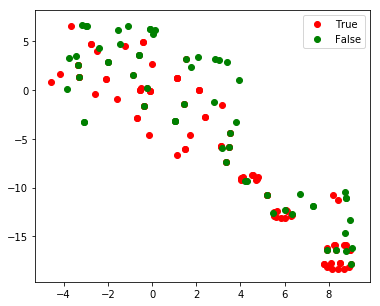

In [171]:
target_ids = range(2)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, ['True','False']):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

<b>With TSNE also, we cannot able to seggregate the data </b>

In [198]:
import sqlite3
conn = sqlite3.connect('task1.sqlite')
Customer_Orders_DF.to_sql('Customer_Orders_DF', conn, if_exists='replace', index=False)
Customer_Payment_DF.to_sql('Customer_Payment_DF', conn, if_exists='replace', index=False)
Customer_transaction_DF.to_sql('Customer_transaction_DF', conn, if_exists='replace', index=False)
#print(pd.read_sql('select * from Customer_Orders_DF', conn))
conn.close()

In [200]:
conn = sqlite3.connect('task1.sqlite')

In [206]:
cust_transaction_details  = pd.read_sql('select b.customerEmail,b.transactionId,b.orderId,b.paymentMethodId,'+
            '(select paymentMethodRegistrationFailure from Customer_Payment_DF d where d.customerEmail=b.customerEmail and d.paymentMethodId=b.paymentMethodId) as paymentMethodRegistrationFailure,'+
            '(select paymentMethodType from Customer_Payment_DF d where d.customerEmail=b.customerEmail and d.paymentMethodId=b.paymentMethodId) as paymentMethodType,'+
            '(select paymentMethodProvider from Customer_Payment_DF d where d.customerEmail=b.customerEmail and d.paymentMethodId=b.paymentMethodId) as paymentMethodProvider,'+
            'b.transactionAmount,b.transactionFailed,a.orderState '+
            'from Customer_Orders_DF a, Customer_transaction_DF b where a.customerEmail=b.customerEmail and ' +
           ' a.orderId=b.orderId', conn)

In [211]:
cust_transaction_details.to_csv('cust_transaction_details.csv')

In [210]:
cust_transaction_details.customerEmail.unique().shape

(136,)

out of 161 customers , 136 made atleast one transaction and has payments done.

In [215]:
#Lets See if a customer has not opted for any payment method, whether he is fraud or not?
Customer_DF[Customer_DF.No_Payments==0]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Fraud_Decoded,Is_Duplicate_Name
34,zbennett@frazier.com,995.449.5115x498,zxdd5co6f5pylq9it4x0,e03d:db6e:f5ca:b9cd:d64f:80fe:6177:26e1,89773 Peterson Course Suite 625\nEast Amandabo...,0,0,0,False,0,0
38,xwang@white.com,592.309.4963x427,1qj6z7funp3l28ym8trh,7891:9f08:9ac6:c816:7c58:26cd:ff2c:7ddc,"139 Ramirez Island Suite 885\nNew Joan, MT 69993",0,0,0,False,0,0
44,gsimpson@cox.org,+23(4)1428642270,nf0i429dh2h2fmf287ec,20.34.8.37,"32514 Freeman Court\nPort Waltermouth, SC 34012",0,0,0,False,0,0
47,johnsonjennifer@yahoo.com,1-670-969-5075x27186,yqt388sj7f142rohzukc,172.191.99.44,"6395 Christopher Lakes Suite 062\nSouth Dana, ...",0,0,0,False,0,0
54,zthomas@gmail.com,731.957.1783x62296,7p70n6q6zbgfhiqqqsxy,ad37:7b02:70fb:4b74:bc77:cd13:1bed:2483,"01494 Anderson Corners Suite 314\nDaviston, SC...",0,0,0,False,0,0
70,brockmatthew@hotmail.com,800.814.4655x012,132m3ourosp5a28ksvou,188.74.171.130,"08645 Alvarado Way Suite 514\nMillerfurt, AL 8...",0,0,0,False,0,0
125,wbeltran@ramirez-shaffer.com,1-627-545-5097x7356,z0uxvp8sio7nyv7op58j,1b75:d451:c48a:12:cfc7:bc1e:d748:ee62,"4873 Perez Groves\nWest Gregoryburgh, NH 45193...",0,0,0,False,0,0
133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True,1,1
137,stephanie21@reyes-spencer.biz,990.862.5466x7247,r526953keh7ctxcf9lnh,96eb:8d53:678:53ba:599b:5db6:3fe3:3218,"31068 Vance Forks Suite 516\nNew Christopher, ...",0,0,0,False,0,0
139,bhorne@fuller-nelson.com,1-512-954-5541,dgfa5pe2t45d1u6ox33l,118e:7887:94b6:b2a7:d2ad:8f35:c241:3149,"25653 Key Gateway\nPort Robert, PA 64370",0,0,0,False,0,0


<b>If the no of payment methods mentioned are 0 and no duplicates ,then he is not a fraud</b>

In [277]:
Customer_Payment_DF.paymentMethodType.unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

<h2>Lets look at how many successfull transactions did by a cutomer till now</h2>

In [242]:
cust_transaction_details[(cust_transaction_details.transactionFailed>0) & (cust_transaction_details.customerEmail=='vmiller@hotmail.com')].groupby(['customerEmail'])['transactionFailed'].count()

customerEmail
vmiller@hotmail.com    3
Name: transactionFailed, dtype: int64

In [285]:
Customer_DF['No_Successfull_Transactions'] = Customer_DF['customerEmail'].apply(lambda x: cust_transaction_details[(cust_transaction_details.transactionFailed==0) & (cust_transaction_details.customerEmail==x)]['transactionFailed'].count())
Customer_DF['No_Failed_Transactions'] = Customer_DF['customerEmail'].apply(lambda x: cust_transaction_details[(cust_transaction_details.transactionFailed>0) & (cust_transaction_details.customerEmail==x)]['transactionFailed'].count())
Customer_DF['No_Transactions']=Customer_DF['customerEmail'].apply(lambda x: cust_transaction_details[ (cust_transaction_details.customerEmail==x)]['transactionId'].count())
Customer_DF['No_Orders']=Customer_DF['customerEmail'].apply(lambda x: Customer_Orders_DF[ (Customer_Orders_DF.customerEmail==x)]['orderId'].count())
Customer_DF['No_Payments']=Customer_DF['customerEmail'].apply(lambda x: Customer_Payment_DF[(Customer_Payment_DF.customerEmail==x)]['paymentMethodId'].count())

In [345]:
cust_transaction_details[(cust_transaction_details.orderState=='fulfilled') ].sort_values(by=['customerEmail'])

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
552,1yf0@jedyz63t,pkc9dfn2,st9dv0,0l7kszls7,0,card,VISA 13 digit,12,1,fulfilled
551,1yf0@jedyz63t,i4edjdey,st9dv0,0l7kszls7,0,card,VISA 13 digit,12,1,fulfilled
550,1yf0@jedyz63t,cnion0pc,st9dv0,0l7kszls7,0,card,VISA 13 digit,12,1,fulfilled
543,1yf0@jedyz63t,foo56851,gcop7b,igpmsjd73,0,paypal,Mastercard,38,0,fulfilled
544,1yf0@jedyz63t,drngwa51,eftfwy,0l7kszls7,0,card,VISA 13 digit,11,0,fulfilled
545,1yf0@jedyz63t,5010w1m2,1ca3sy,vej6hz0vq,0,card,Maestro,45,1,fulfilled
546,1yf0@jedyz63t,xyavqxjg,1ca3sy,0l7kszls7,0,card,VISA 13 digit,45,0,fulfilled
547,1yf0@jedyz63t,84xwwv0d,is64fx,igpmsjd73,0,paypal,Mastercard,18,0,fulfilled
549,1yf0@jedyz63t,7nib2tyk,st9dv0,0l7kszls7,0,card,VISA 13 digit,12,0,fulfilled
548,1yf0@jedyz63t,67o717jo,st9dv0,igpmsjd73,0,paypal,Mastercard,12,1,fulfilled


In [448]:
import re
def ret_trn_fail_ord_success(x):
    cust_dict={}
    for det in cust_transaction_details[(cust_transaction_details.customerEmail==x) & (cust_transaction_details.orderState=='fulfilled') & (cust_transaction_details.transactionFailed==1)].iterrows():
        #print(det[1].orderId)
        if not cust_transaction_details[(cust_transaction_details.customerEmail==det[1].customerEmail) & (cust_transaction_details.orderId==det[1].orderId) &
                                 (cust_transaction_details.transactionFailed==0)]['customerEmail'].count()>0:
            #print(det[1].orderId)
            cust_dict[det[1].orderId]=1
    return len(cust_dict)
def valid_email(email):
    if bool(re.search(r"^[\w\.\+\-]+\@[\w\-]+\.[a-z]{2,4}$", email)):
        return 1
    else:
        return 0
def ret_pay_counts(x):
    import pandas as pd
    lst1=[]
    for i in ['card', 'bitcoin', 'apple pay', 'paypal']:
        lst1.append(Customer_Payment_DF[(Customer_Payment_DF.customerEmail==x) &(Customer_Payment_DF.paymentMethodType==i) & (Customer_Payment_DF.paymentMethodRegistrationFailure==False)].shape[0])
    return pd.Series(lst1)

<h2>Pending, Failed, fulfilled orders per customer</h2>

In [283]:
Customer_DF[Customer_DF.customerEmail.isin(cust_transaction_details[cust_transaction_details.paymentMethodType=='bitcoin'].customerEmail.unique().tolist())]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Fraud_Decoded,Is_Duplicate_Name,No_Successfull_Transactions,No_Failed_Transactions,No_Failed_Orders,No_Success_Orders,No_Pending_Orders
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1,0,2,1,0,3,0
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True,1,1,22,6,2,21,0
11,ksummers@hotmail.com,1-023-275-4692,2ngkzu1idwxintmxwmgn,184.97.57.11,"46383 Matthew Track Apt. 220\nRomanburgh, DC 9...",7,5,4,False,0,0,4,3,0,5,0
12,christineklein@wright-boyd.org,897-464-6425x941,j8cp1uydkuyza2eo0mir,4304:521a:e1c3:766b:21f3:ac3:4ab2:5a2,"67636 Renee Islands Suite 307\nTeresaview, ND ...",4,4,3,False,0,0,4,0,0,3,1
16,dana09@yahoo.com,515.708.2280x105,wb0uylp0rwy01x5j1jzd,166.148.66.158,812 Moss Radial Suite 844\nNorth Patriciaburgh...,6,3,2,False,0,0,3,3,0,3,0
22,davismike@hotmail.com,467-222-0933x910,4hzaaor6es3iyuiavyio,162.48.39.230,"07078 Brent Ways Apt. 999\nAlvarezshire, ND 82309",4,3,1,False,0,0,3,1,1,2,0
29,catherine64@gmail.com,563-396-2038x288,myjxxvd3jfn1eymfy50n,1289:d2a9:c65d:8fc7:7be4:129b:d7b:cf7b,"372 Michael Club Suite 553\nHerrerafort, MH 52953",5,4,6,True,1,0,4,1,1,2,1
40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True,1,1,22,6,2,21,0
45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True,1,1,22,6,2,21,0
64,suzanne21@gmail.com,1-043-962-2576,ewc3gyloi1ing9o64jpt,4834:7ccb:15de:9123:5658:42c3:cc50:79f,"398 Latasha Canyon\nKathyland, LA 36717-2161",5,3,2,True,1,0,3,2,1,2,0


In [420]:
Customer_Payment_DF

,customerEmail,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,josephhoward@yahoo.com,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,evansjeffery@yahoo.com,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,evansjeffery@yahoo.com,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,evansjeffery@yahoo.com,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,evansjeffery@yahoo.com,m52tx8e1s,False,card,Mastercard,Vertex Bancorp
5,evansjeffery@yahoo.com,41ug157xz,False,bitcoin,American Express,Bastion Banks
6,evansjeffery@yahoo.com,4dpg5sx2b,False,card,Maestro,Her Majesty Trust
7,evansjeffery@yahoo.com,bcx9pa3wf,False,card,JCB 16 digit,Fountain Financial Inc.
8,andersonwilliam@yahoo.com,8pneoi03z,False,card,JCB 16 digit,Bastion Banks
9,andersonwilliam@yahoo.com,dluy3jka0,False,card,Discover,His Majesty Bank Corp.


In [258]:
Customer_DF['No_Failed_Orders'] = Customer_DF['customerEmail'].apply(lambda x: Customer_Orders_DF[(Customer_Orders_DF.orderState=='failed') & (Customer_Orders_DF.customerEmail==x)]['orderId'].count())
Customer_DF['No_Success_Orders'] = Customer_DF['customerEmail'].apply(lambda x: Customer_Orders_DF[(Customer_Orders_DF.orderState=='fulfilled') & (Customer_Orders_DF.customerEmail==x)]['orderId'].count())
Customer_DF['No_Pending_Orders'] = Customer_DF['customerEmail'].apply(lambda x: Customer_Orders_DF[(Customer_Orders_DF.orderState=='pending') & (Customer_Orders_DF.customerEmail==x)]['orderId'].count())

In [350]:
Customer_DF['No_Pending_Orders'] = Customer_DF['customerEmail'].apply(lambda x: Customer_Orders_DF[(Customer_Orders_DF.orderState=='pending') & (Customer_Orders_DF.customerEmail==x)]['orderId'].count())
Customer_DF['Trn_Failed_Ord_Fulfil'] = Customer_DF['customerEmail'].apply(lambda x: ret_trn_fail_ord_success(x))
Customer_DF['Valid_Email'] = Customer_DF['customerEmail'].apply(lambda x: valid_email(x))

In [440]:
Customer_DF[['card', 'bitcoin', 'apple pay', 'paypal']] = Customer_DF['customerEmail'].apply(lambda x: ret_pay_counts(x))

In [421]:
Customer_DF['No_Success_Payement_Reg'] = Customer_DF['customerEmail'].apply(lambda x: Customer_Payment_DF[(Customer_Payment_DF.customerEmail==x) & (Customer_Payment_DF.paymentMethodRegistrationFailure==False)].shape[0])

In [442]:
#cust_transaction_details[cust_transaction_details.customerEmail=='ujackson@harris.com']
#Customer_DF[Customer_DF['customerBillingAddress'].duplicated()]
Customer_DF[Customer_DF.Fraud_Decoded==1]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Fraud_Decoded,...,No_Pending_Orders,Is_Duplicate_IP,Is_Duplicate_Address,Trn_Failed_Ord_Fulfil,Valid_Email,No_Success_Payement_Reg,card,bitcoin,apple pay,paypal
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1,...,0,0,0,1,1,6,5,1,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,1,...,0,0,0,2,1,6,3,0,3,0
5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True,1,...,1,0,0,0,1,2,1,0,0,1
6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,True,1,...,0,0,0,0,1,2,1,0,1,0
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",28,23,11,True,1,...,0,0,0,1,1,11,8,1,1,1
9,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,...",0,0,1,True,1,...,0,0,0,0,1,1,0,0,0,1
10,bowenwilliam@yahoo.com,(128)248-4091x37789,qmntgod0numz62gzbla7,231.91.253.19,"27061 Wright Forks\nCraigland, MN 59915",6,5,1,True,1,...,1,0,0,1,1,1,1,0,0,0
15,gonzalesjackson@gmail.com,1-410-373-1228x129,hmkn4nmfc5q5mgify2zw,229.2.225.188,"566 Courtney Stream\nReedland, NH 84853",4,4,1,True,1,...,0,0,0,0,1,1,0,0,1,0
23,guerramichael@hotmail.com,299-883-0904,webmbgi39hwejv3d90kt,245.38.171.222,"13553 Michelle Freeway Apt. 290\nTammyhaven, G...",0,0,1,True,1,...,0,0,0,0,1,1,0,0,0,1
29,catherine64@gmail.com,563-396-2038x288,myjxxvd3jfn1eymfy50n,1289:d2a9:c65d:8fc7:7be4:129b:d7b:cf7b,"372 Michael Club Suite 553\nHerrerafort, MH 52953",5,4,6,True,1,...,1,0,0,0,1,6,4,2,0,0


<h2>Data Splitting and Model training</h2>

In [461]:
data = Customer_DF[['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud_Decoded', 'Is_Duplicate_Name',
       'No_Successfull_Transactions', 'No_Failed_Transactions',
       'No_Failed_Orders', 'No_Success_Orders', 'No_Pending_Orders',
       'Is_Duplicate_IP', 'Is_Duplicate_Address', 'Trn_Failed_Ord_Fulfil',
       'Valid_Email', 'No_Success_Payement_Reg', 'card', 'bitcoin',
       'apple pay', 'paypal']].copy()

In [472]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Fraud_Decoded'], data[['Fraud_Decoded']],
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=data[['Fraud_Decoded']])

In [485]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = ['Fraud','Not Fraud']#[0,1,2,3,4]
    
    
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(15,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [495]:
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_xgb=False):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro')
    grid.fit(train_data_x, train_data_y)
    
    
    results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
    params = results['params']                         #storing combination of parameters used by model in params
    score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    
    
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    if not is_xgb:
        plt.xlabel(parameter_name)
        plt.title('Cross Validation')
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
        plt.legend(['Train Accuracy', 'CV Accuracy'])
        plt.show()
    
    return grid.best_params_

In [469]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, classification_report

from collections import Counter, defaultdict
import numpy as np

<h2>Logistic Regression</h2>

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\li

For {'C': 1e-05}  acc of Train data is 0.38697165706545594 and acc of CV data is 0.37153650634042784
For {'C': 0.0001}  acc of Train data is 0.38697165706545594 and acc of CV data is 0.3754616271133747
For {'C': 0.001}  acc of Train data is 0.47574215085031807 and acc of CV data is 0.4507341130749424
For {'C': 0.01}  acc of Train data is 0.6743787833668956 and acc of CV data is 0.6534661763988278
For {'C': 0.1}  acc of Train data is 0.742468214252532 and acc of CV data is 0.6644334975369458
For {'C': 1}  acc of Train data is 0.7554584742837497 and acc of CV data is 0.6794491520072623
For {'C': 10}  acc of Train data is 0.7641435073196079 and acc of CV data is 0.6739669461555008
For {'C': 100}  acc of Train data is 0.7623019607065963 and acc of CV data is 0.6836489107287695
For {'C': 1000}  acc of Train data is 0.7706167499440674 and acc of CV data is 0.6836489107287695
For {'C': 10000}  acc of Train data is 0.7706167499440674 and acc of CV data is 0.6836489107287695
Best Parameter is  

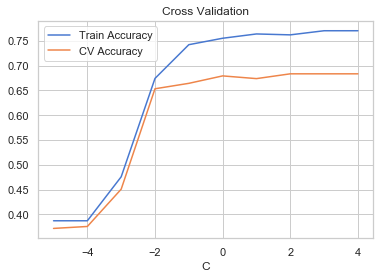

Accuracy of model on testing data is 0.8235294117647058
F1 Score of model on testing data is 0.7984189723320159
Log loss of model on testing data is 0.3665741195775375


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [498]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', x_train, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(C = best_alpha).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

Accuracy of model on testing data is 82.3%

-------------------- Confusion matrix --------------------


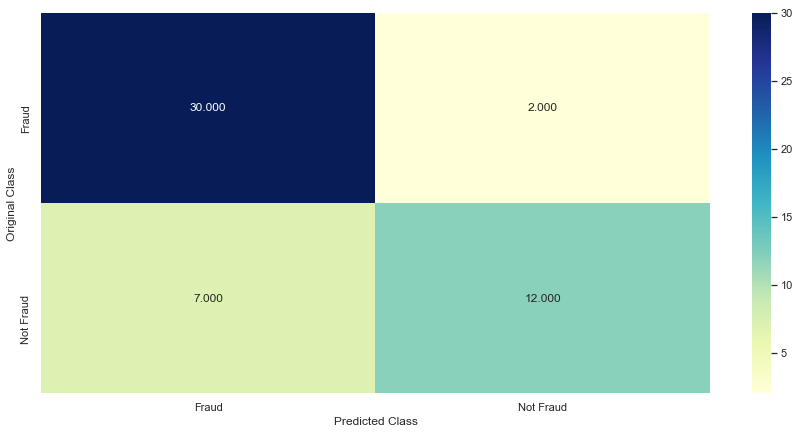

In [488]:
plot_confusion_matrix(y_test, y_pred)

In [507]:
weights = clf.coef_.argsort()
new_weights = weights[0][:-1]
pos_weights = np.take(x_train.columns,new_weights[-5:])
print("*******************Top 5 positive features*****************************")
print(pos_weights.values)
print("************************************************************************")

weights = clf.coef_.argsort()
new_weights = weights[0][:-1]
pos_weights = np.take(x_train.columns,new_weights[:5])
print("*******************Top 5 Negative features*****************************")
print(pos_weights.values)
print("************************************************************************")

*******************Top 5 positive features*****************************
['No_Failed_Transactions' 'No_Failed_Orders' 'No_Pending_Orders'
 'No_Orders' 'Is_Duplicate_IP']
************************************************************************
*******************Top 5 Negative features*****************************
['Valid_Email' 'Trn_Failed_Ord_Fulfil' 'No_Successfull_Transactions'
 'No_Transactions' 'card']
************************************************************************


<h2>SVM</h2>

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

For {'C': 1e-05}  acc of Train data is 0.39062500000000006 and acc of CV data is 0.39062500000000006
For {'C': 0.0001}  acc of Train data is 0.39062500000000006 and acc of CV data is 0.39062500000000006
For {'C': 0.001}  acc of Train data is 0.5475860889040969 and acc of CV data is 0.526008174584247
For {'C': 0.01}  acc of Train data is 0.5858496702869114 and acc of CV data is 0.5628958687300057
For {'C': 0.1}  acc of Train data is 0.7031810652753858 and acc of CV data is 0.6513347309573726
For {'C': 1}  acc of Train data is 0.7777005246075118 and acc of CV data is 0.6871470202898916
For {'C': 10}  acc of Train data is 0.7768785919212284 and acc of CV data is 0.630527025442128
For {'C': 100}  acc of Train data is 0.7768785919212284 and acc of CV data is 0.630527025442128
For {'C': 1000}  acc of Train data is 0.7768785919212284 and acc of CV data is 0.630527025442128
For {'C': 10000}  acc of Train data is 0.7768785919212284 and acc of CV data is 0.630527025442128
Best Parameter is  {'C'

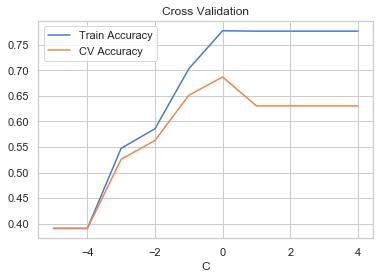

Accuracy of model on testing data is 0.803921568627451
F1 Score of model on testing data is 0.7538610038610039
Log loss of model on testing data is 0.45119490216018304


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [508]:
from sklearn.svm import SVC


model = SVC( kernel='linear')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', x_train, y_train, alpha)

best_alpha = best_params['C']
clf = SVC( kernel='linear',C = best_alpha,probability=True).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


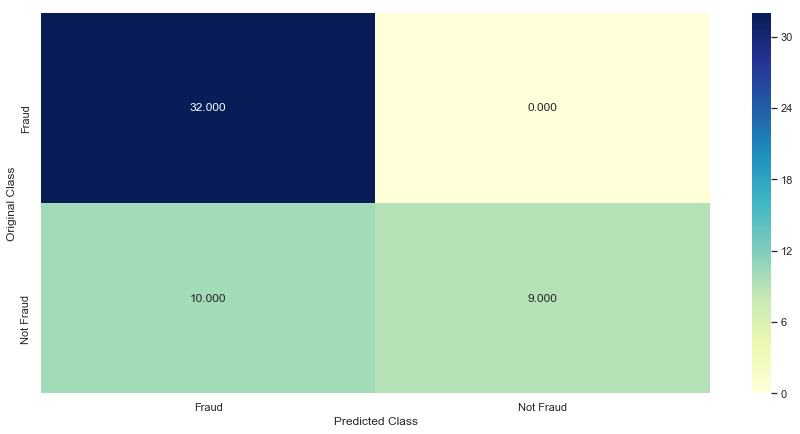

In [490]:
plot_confusion_matrix(y_test, y_pred)

In [509]:
weights = clf.coef_.argsort()
new_weights = weights[0][:-1]
pos_weights = np.take(x_train.columns,new_weights[-5:])
print("*******************Top 5 positive features*****************************")
print(pos_weights.values)
print("************************************************************************")

weights = clf.coef_.argsort()
new_weights = weights[0][:-1]
pos_weights = np.take(x_train.columns,new_weights[:5])
print("*******************Top 5 Negative features*****************************")
print(pos_weights.values)
print("************************************************************************")

*******************Top 5 positive features*****************************
['No_Failed_Orders' 'No_Payments' 'apple pay' 'No_Orders'
 'Is_Duplicate_IP']
************************************************************************
*******************Top 5 Negative features*****************************
['Valid_Email' 'No_Successfull_Transactions' 'No_Transactions' 'paypal'
 'Trn_Failed_Ord_Fulfil']
************************************************************************
